In [125]:
# Importation des bibliotheuques necessaires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import plotly.express as px 
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from  sklearn.model_selection import GridSearchCV
import  Knn_classifiers as knn

In [126]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r drive/MyDrive/projet/* .

ModuleNotFoundError: No module named 'google'

In [127]:
from sklearn import preprocessing

In [128]:
import Knn_classifiers as solution
m=solution.KnnClassifier()

#help(solution.KnnClassifier.train)
m.train()

TypeError: train() missing 2 required positional arguments: 'x_train' and 'y_train'

In [129]:
#help(solution.KnnClassifier.train)
m.train()

TypeError: train() missing 2 required positional arguments: 'x_train' and 'y_train'

In [130]:
print(m)

In [131]:
# Importation des données
data= pd.read_csv("healthcare-dataset-stroke-data.csv")

In [132]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [133]:
data.duplicated().sum()

0

In [134]:
data.drop(["id"], axis=1, inplace=True) 

In [135]:
data.shape

(5110, 11)

In [136]:
#statistiques descriptives sur les données
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [137]:
#le type des variables
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<AxesSubplot:>

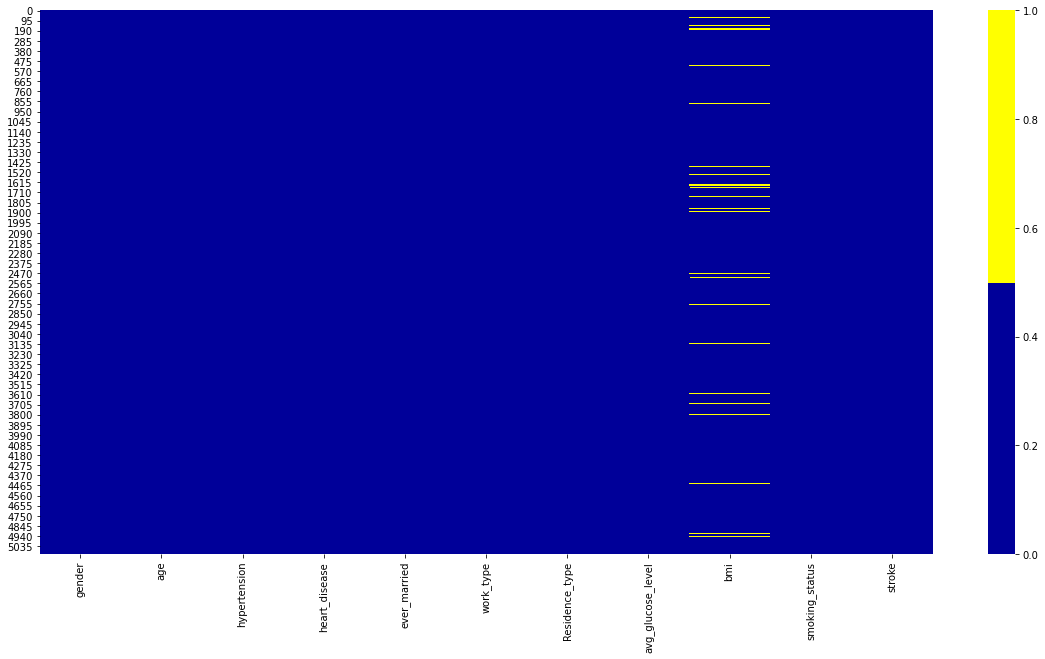

In [138]:
# chercher les valeurs nulles
plt.figure(figsize = (20,10))
cols = data.columns[:76] # first 76 columns
colours = ['#000099', '#ffff00'] # coleurs - jaune null. bleue pas null.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [139]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [140]:
taux_bmi_null=data["bmi"].isnull().sum()/data.shape[0]*100
print("le taux de la variable bmi en pourcentage", taux_bmi_null)

le taux de la variable bmi en pourcentage 3.9334637964774952


In [141]:
data["bmi"].median()

28.1

In [142]:
# nous remplaçons les valeurs nulles de la vraiables bmi par sa mediane
data["bmi"]=data["bmi"].replace(np.nan, data["bmi"].median())

In [143]:
data["bmi"].isnull().sum()

0

In [144]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [145]:
# la repartition des personnes atteintes selon le genre
y = data["stroke"]  
fig = px.pie(values=y, names=data["gender"]) 
fig.show()

Segmentation de notre dataset selon la tranche d age afin de visualiser la tranche d age la plus touchée par les attaques cardiaques

In [146]:
labels = [ "{0} - {1}".format(i, i + 19) for i in range(0, 100, 20) ]
c = pd.cut(data.age, np.arange(0, 101, 20),
           include_lowest=True, right=False,
           labels=labels)

df=data.groupby(c).sum()
var=df["age"].index
var
df["var"]=var

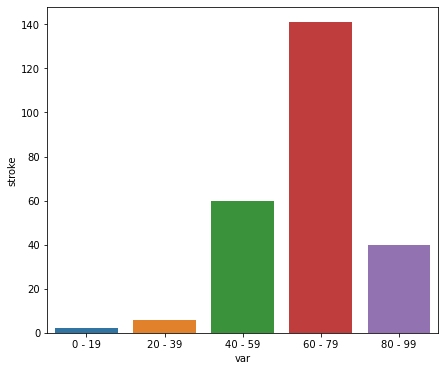

In [147]:
plt.figure(figsize=(7, 6))
sns.barplot(x='var',y="stroke",  data=df);

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

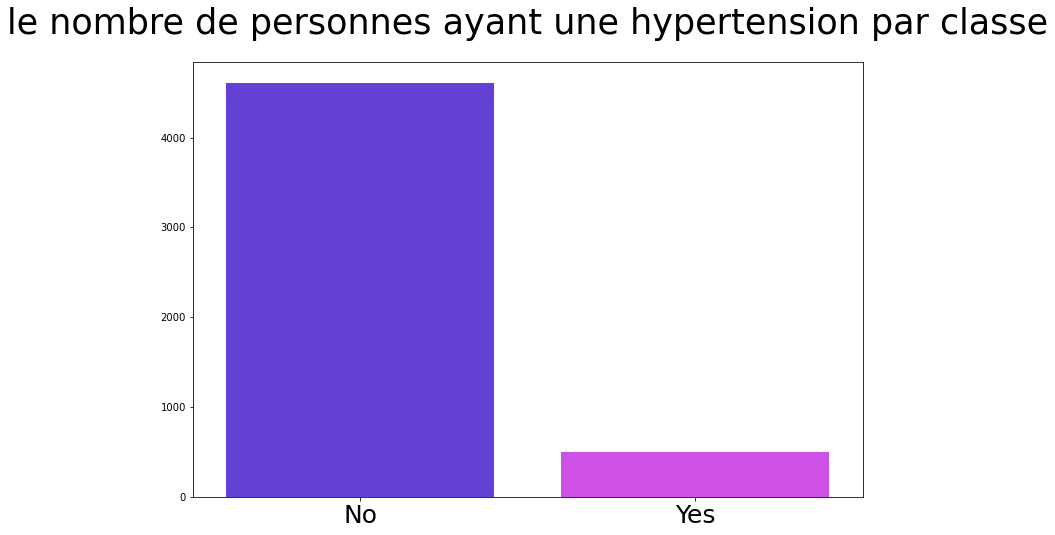

In [148]:
two_colors = ['#dd38ff', '#5727ed']
plt.figure(figsize=(12, 8))
hypertension_plot = sns.countplot(x=data.hypertension,
                            palette=two_colors[::-1])
hypertension_plot.set_title('le nombre de personnes ayant une hypertension par classe',
                      fontsize=35, y=1.05)
hypertension_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
hypertension_plot.set_xticklabels(['No', 'Yes'], size=25)

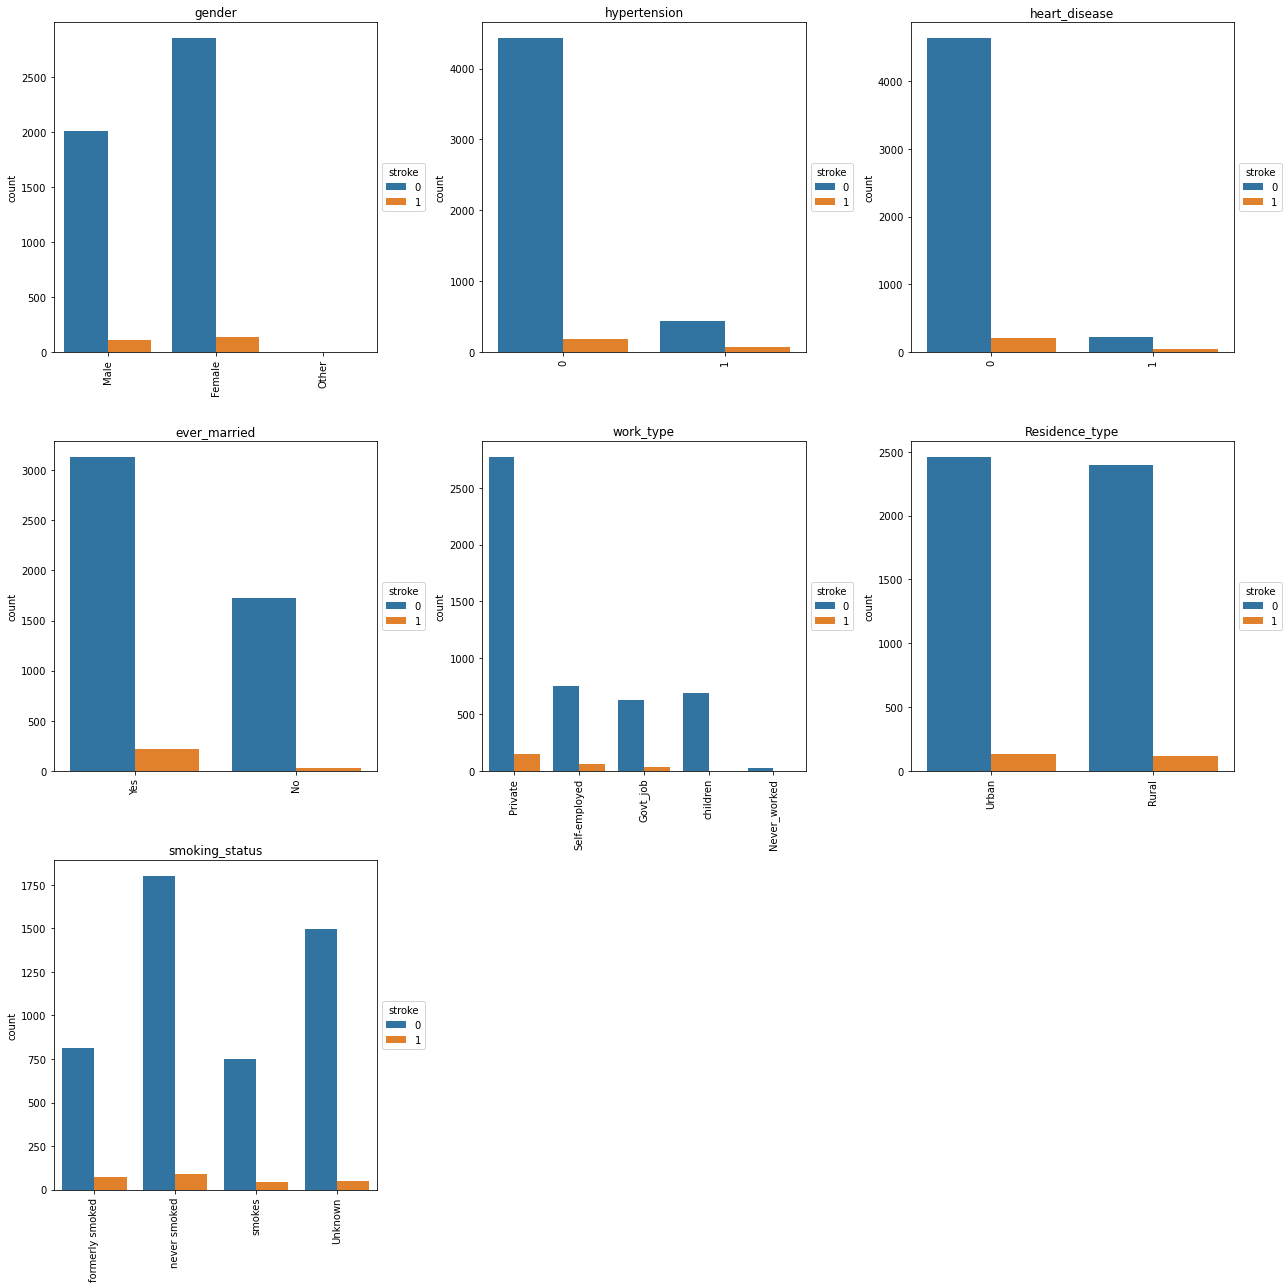

In [149]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'Residence_type', 'smoking_status']

fig, ax = plt.subplots(3,3,figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
    
  sns.countplot(data=data, x=col, hue='stroke', ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)
  axes_list[i].legend(title='stroke', loc='center left', bbox_to_anchor=(1, 0.5))

  plt.setp(axes_list[i].get_xticklabels(), rotation=90)
  

axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

In [150]:
# les variables numeriques de notre dataset
#dnum=pd.DataFrame({})
for att in data.columns:
    if data[att].dtype in ("float64" , "int64"):
        #dnum[att]=data[att]
        print(att)




age
hypertension
heart_disease
avg_glucose_level
bmi
stroke


In [151]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']
dnum=data[column_numerical]
dnum

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,28.1
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
...,...,...,...
5105,80.0,83.75,28.1
5106,81.0,125.20,40.0
5107,35.0,82.99,30.6
5108,51.0,166.29,25.6


In [152]:
#On peut faire une normalisation des données numeriques 
#mais on aurra un array il faut apres le tranformer en pandas ou soit 
#df_num = preprocessing.StandardScaler().fit_transform(dnum)
def normalisations(df):
    return (df - df.min()) / ( df.max() - df.min())
df_num = normalisations(dnum)

df_num

,age,avg_glucose_level,bmi
0,0.816895,0.801265,0.301260
1,0.743652,0.679023,0.203895
2,0.975586,0.234512,0.254296
3,0.597168,0.536008,0.276060
4,0.963379,0.549349,0.156930
...,...,...,...
5105,0.975586,0.132167,0.203895
5106,0.987793,0.323516,0.340206
5107,0.426270,0.128658,0.232532
5108,0.621582,0.513203,0.175258


In [153]:
# les variables categorielles de notre dataset encodées
#categorical_attributes = data.select_dtypes("object").columns.tolist()
#print(categorical_attributes)
#cat_data = data[categorical_attributes]

#label_encoder = preprocessing.LabelEncoder()

#for column in cat_data:
#    cat_data[column] = label_encoder.fit_transform(cat_data[column])

#cat_data
#val=cat_data.head()
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'residence_type', 'smoking_status']



In [154]:
# les variables categorielles de notre dataset encodées
#categorical_attributes = data.select_dtypes("object").columns.tolist()
#print(categorical_attributes)
#cat_data = data[categorical_attributes]

In [155]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'Residence_type', 'smoking_status']
                      
d_cat=data[column_categorical]
ohe = OneHotEncoder(sparse=False)

ohe.fit(d_cat)

# for col in column_categorical:
X_train_ohe = ohe.transform(d_cat)


# ohe.categories_
X_train_ohe


array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [156]:
column_ohe = ohe.get_feature_names_out(column_categorical)
column_ohe

array(['gender_Female', 'gender_Male', 'gender_Other', 'hypertension_0',
       'hypertension_1', 'heart_disease_0', 'heart_disease_1',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype=object)

In [157]:
#Dans cette partie j'ajoute les deux parties 
d_cat_pd = pd.DataFrame(X_train_ohe, columns=column_ohe, index=d_cat.index)
d_cat_pd.head()

,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [158]:
data_f=pd.concat([d_cat_pd, df_num], axis = 1)
data_f

,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,...,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,avg_glucose_level,bmi
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.816895,0.801265,0.301260
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.743652,0.679023,0.203895
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.975586,0.234512,0.254296
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.597168,0.536008,0.276060
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.963379,0.549349,0.156930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.975586,0.132167,0.203895
5106,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.987793,0.323516,0.340206
5107,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.426270,0.128658,0.232532
5108,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.621582,0.513203,0.175258


In [159]:
# Normalisation des données
# Selection des attributs à normaliser
#df_pure = data_f.drop(labels=['stroke'], axis=1)
#df_num = preprocessing.StandardScaler().fit_transform(df_pure)
#df_num = pd.DataFrame(df_num, columns = df_pure.columns)
#df_num

Afin de selectionner les meilleurs attributs, nous utiliserons une Analyse en Composante principales
Pour cela, nous choisirons les variables les  plus correlées avec la classe de prediction

In [160]:
data_f["stroke"]=data["stroke"]
#print(df_num.head())
df_cor = data_f.corr("pearson")
cor_target = abs(df_cor["stroke"])
best_attributes = cor_target.sort_values(ascending=False).iloc[:11]


print(f"la correlation attributs:\n{best_attributes.drop('stroke')}")
best_attributes = list(best_attributes.index)

la correlation attributs:
age                               0.245257
heart_disease_1                   0.134914
heart_disease_0                   0.134914
avg_glucose_level                 0.131945
hypertension_1                    0.127904
hypertension_0                    0.127904
ever_married_Yes                  0.108340
ever_married_No                   0.108340
work_type_children                0.083869
smoking_status_formerly smoked    0.064556
Name: stroke, dtype: float64


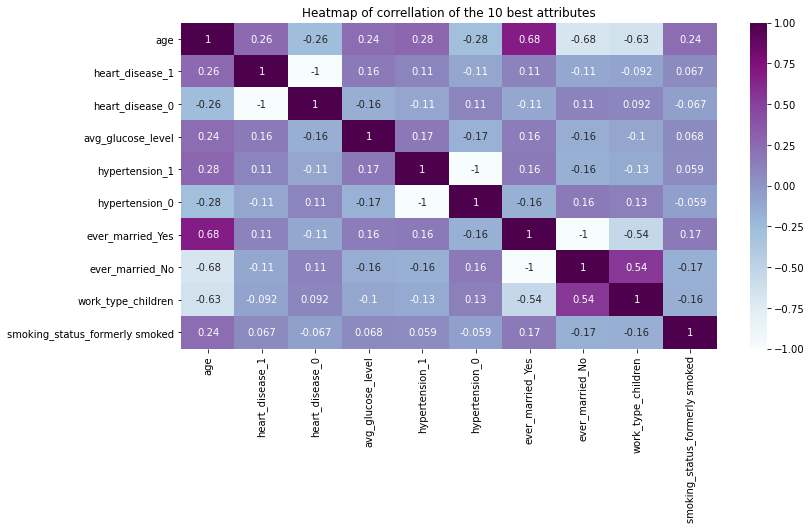

In [161]:
# Correlation entre nos 5 meilleurs variables
# nous constatons qu il n y a pas une forte correlation entre nos variable
df_cov = data_f.loc[:, best_attributes[1:]].T
covariance_matrix = np.corrcoef(df_cov)

plt.figure(figsize = (12,6))
sns.heatmap(covariance_matrix, annot=True, cmap="BuPu", xticklabels=best_attributes[1:], yticklabels=best_attributes[1:])
plt.title("Heatmap of correllation of the 10 best attributes")      
plt.show()

In [162]:
y_train = data_f["stroke"]
X_train = data_f.drop(["stroke"], axis=1)
test_perc = 0.2
X_t, X_test, y_t, y_test = train_test_split(X_train, y_train, test_size=test_perc, random_state=0, shuffle=True)


In [163]:
#Attention Si On veut faire une Cross Validation  on va juste essayer de  separer en deux train_test et X_train pas besoin 
#de faire la partie validation  on va faire cette partie dans le K-FOLD
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.1, random_state=0, shuffle=True)

In [164]:
X_train

,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,...,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,avg_glucose_level,bmi
3399,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.963379,0.131521,0.127148
824,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.462891,0.100175,0.194731
1988,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.450684,0.183039,0.442153
201,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.975586,0.554750,0.242841
2956,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.060059,0.021512,0.064147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.938965,0.640338,0.185567
1383,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.291992,0.159542,0.325315
3111,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.707031,0.488182,0.203895
1335,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.914551,0.090804,0.253150


In [165]:
smote = SMOTE(random_state=0)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [166]:
X_train_res

,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,...,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,avg_glucose_level,bmi
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.000000,0.0,0.000000,1.0,0.963379,0.131521,0.127148
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.000000,0.0,1.000000,0.0,0.462891,0.100175,0.194731
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.000000,0.0,0.000000,0.0,0.450684,0.183039,0.442153
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.000000,1.0,0.000000,0.0,0.975586,0.554750,0.242841
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.000000,0.0,0.000000,0.0,0.060059,0.021512,0.064147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.000000,1.0,0.000000,0.0,0.906382,0.116168,0.216797
6990,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.712575,0.0,0.287425,0.0,0.951172,0.618222,0.189991
6991,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.000000,0.0,1.000000,0.0,0.496254,0.121696,0.170482
6992,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.000000,0.0,0.000000,1.0,0.712179,0.195433,0.187176


In [167]:
#Kross Validation 
#from  sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
#cross_validation=KFold(1,random_state=0)
# cross_val_score(onpasse notre modèle si par exemple ,X,Y,cv=cross_validation)


#Une autre type de validation c'est GRID SEARCH CV

ValueError: `stat` must be one of ['count', 'density', 'probability', 'frequency'], but percent was passed.`

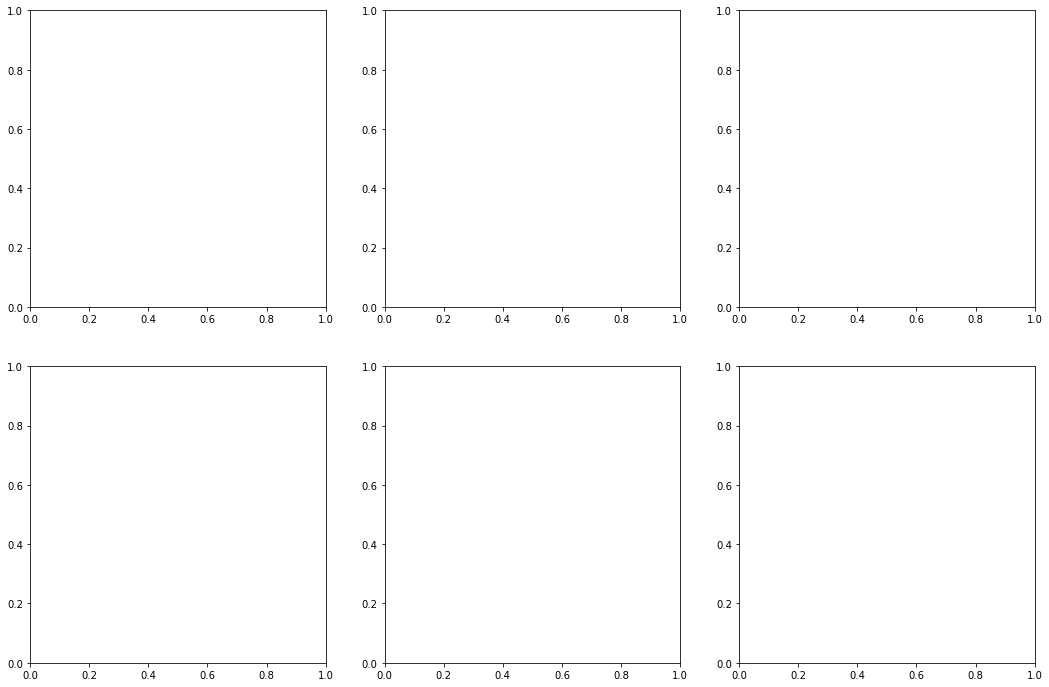

In [168]:
X_train_res_df = pd.DataFrame(X_train_res, columns=X_train_res.columns)
y_train_res_df = pd.DataFrame(y_train_res, columns=['stroke'])

data_resampled = pd.concat([X_train_res_df, y_train_res_df], axis=1)

column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(2, 3, figsize=(18,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical):
  sns.histplot(data=data, x=col, hue='stroke', multiple='stack', stat='percent', ax=axes_list[i])
  axes_list[i].set_title('Original')

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_resampled, x=col, hue='stroke', multiple='stack', stat='percent', ax=axes_list[i+3])
  axes_list[i+3].set_title('SMOTE')

plt.tight_layout()
plt.show()

In [ ]:
y_val[y_val==0].shape

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


model.fit(X_train,y_train)

y_pred = model.predict(X_test)


In [ ]:
print(y_pred.shape)
#print(X_test.shape)

print(y_test.shape[0])



In [169]:
((-y_pred+y_test)**2).mean()*100

NameError: name 'y_pred' is not defined

In [170]:

#print(classification_report(y_test, y_pred, digits=3))

In [171]:
print('Accuracy\t: ', round(accuracy_score(y_test, y_pred),3))
print('Precision\t: ', round(precision_score(y_test, y_pred, average='macro'),3)) 
print('Recall\t\t: ', round(recall_score(y_test, y_pred, average='macro'),3))

NameError: name 'y_pred' is not defined

In [172]:
X_train=X_train_res 
y_train=y_train_res

In [187]:
import Knn_classifiers as solution
m=solution.KnnClassifier()

#help(solution.KnnClassifier.train)



m.train(X_train,y_train)



In [188]:
var=m.prediction(X_test)
m.prediction

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [177]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


# SVM

from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 0)
classifier_svc.fit(X_train, y_train)


# Kernel SVM

classifier_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier_rbf.fit(X_train, y_train)

# K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

# Decsion Tree

from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

# Finding the predictions of each model

y_pred = classifier.predict(X_test)

y_pred_svc = classifier_svc.predict(X_test)

y_pred_rbf = classifier_rbf.predict(X_test)

y_pred_knn = classifier_knn.predict(X_test)

y_pred_dt = classifier_dt.predict(X_test)

# Finding the accuracy of each model

from sklearn.metrics import accuracy_score

print("Logistic Regression - " , accuracy_score(y_test, y_pred)) #Regression logistique

print("SVM - " , accuracy_score(y_test, y_pred_svc)) #SVM

print("Kernel SVM - ", accuracy_score(y_test, y_pred_rbf)) #Noyau RBF

print("KNN - " , accuracy_score(y_test, y_pred_knn))

print("Decision Tree - ", accuracy_score(y_test, y_pred_dt))


E:\annaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression -  0.7651663405088063
SVM -  0.7514677103718199
Kernel SVM -  0.7954990215264188
KNN -  0.8268101761252447
Decision Tree -  0.898238747553816


In [178]:
from sklearn.linear_model import Perceptron
classifier_pc = Perceptron(random_state=42)
classifier_pc.fit(X_train, y_train)
y_pred_pc = classifier_pc.predict(X_test)
print("Pour le perceptron : " , accuracy_score(y_test,y_pred_pc ))

Pour le perceptron :  0.735812133072407


In [179]:
param_grid={'n_neighbors':np.arange(1,20),
                    'metric':['euclidean','manhattan']}

grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=10)
grid.fit(X_train,y_train)
grid.best_score_
grid.best_params_ 

grid.best_params_["metric"]

'manhattan'

In [180]:
grid.best_score_

0.9443838136112814

In [181]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors =3, metric = 'manhattan')
classifier_knn.fit(X_train, y_train)
y_pred_knn = classifier_knn.predict(X_test)
print("KNN - " , accuracy_score(y_test, y_pred_knn))

KNN -  0.8679060665362035


In [182]:
# Resultat for Visual Comparison
accu_dict = {}

# Dictionary  of labels for test preditions and list of score fonctions
pred_dict = {}
scorers = {"Accuracy": 'accuracy', "Precision": 'precision_micro', "F1": 'f1_micro'}


In [ ]:
#model = RandForestClassifier(X_train, y_train_not_bin, X_val, y_val_not_bin, class_names, scorers)
#model.train_default(verbose=True)

#print(model.__class__.__name__)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_perc, random_state=0, shuffle=True)

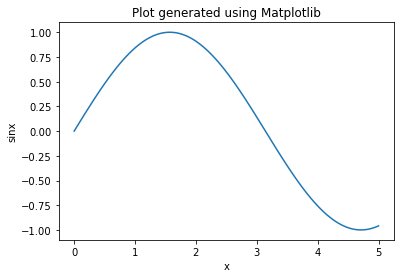

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#x=np.linspace(0,5,100)
#y=np.sin(x)
#plt.plot(x, y)
#plt.title("Plot generated using Matplotlib")
#plt.xlabel("x")
#plt.ylabel("sinx")
#plt.savefig("Plot generated using Matplotlib.png")
#Pour L'Affichage 